# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style='whitegrid', font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

### Ответ.
Общая формула для нахождения оценки с лекции:\
$
\begin{cases}
\mathsf{E}_{\theta}X_1 = \overline X\\
\mathsf{E}_{\theta}{X_1}^2 = \overline {X^2}\\
\text{...}\\
\mathsf{E}_{\theta}{X_1}^d = \overline {X^d}\\
\end{cases}
$

где $X_1$ - случайная величина распределённая по $P_{\theta}$.\
$\theta \in \mathbb{R}^d$

##### Часть 1.
$d = 2$

Первое уравнение: $\frac{a + b}{2} = \overline X$,\
$a + b = 2 * \overline X$

Второе уравнение вида $\mathsf{E}_{\theta}{X_1}^2 = \overline {X^2}$\
$\mathsf{E}_{\theta}{X_1}^2 = \int_a^b \frac{1}{b - a} * x^2 dx = 
\frac{x^3}{3 * (b - a)} |_a^b = \frac{a^2 + ab + b^2}{3}$\
Иными словами:\
$a^2 + ab + b^2 = 3 * \overline {X^2}$

Решая систему\
$
\begin{cases}
a + b = 2 * \overline X\\
a^2 + ab + b^2 = 3 * \overline {X^2}\\
\end{cases}
$

$(2 \overline X - b)^2 + (2 \overline X - b)b + b^2 = 3 \overline {X^2}$

$b^2 + b(-4 \overline X + 2 \overline X) + (4{\overline X}^2 - 3\overline {X^2}) = 0$

$b^2 - b(2 \overline X) + (4{\overline X}^2 - 3\overline {X^2}) = 0$

$D = 4{\overline X}^2 - 4 (4{\overline X}^2 - 3\overline {X^2}) = 12 \overline {X^2} - 12 {\overline X}^2$ 

Получим **Ответ:** (в силу симметричности $a, b$ в системе и $a < b$)\
$\widehat b = \overline X + \sqrt{3 \overline {X^2} - 3 {\overline X}^2}$\
$\widehat a = \overline X - \sqrt{3 \overline {X^2} - 3 {\overline X}^2}$

*Замечание: Можно было воспользоваться известной формулой дисперсии $\frac{(b-a)^2}{2}$ и оценкой дисперсии $\overline {X^2} - {\overline X}^2$*

##### Часть 2.
$d = 1$

Докажем что:
$\mathsf{E}_{\theta}X_1 = \theta$\
Откуда сразу **Ответ**: $\widehat \theta = \overline X$

Доказательство:\
$\mathsf{E}_{\theta}{X_1} = \sum_{k = 1}^{\infty} \frac{e^{-\theta} * {\theta}^k}{k!} k = 
e^{-\theta} * \theta * \sum_{k = 1}^{\infty} \frac{{\theta}^{k - 1}}{(k - 1)!} = 
e^{-\theta} * \theta * \sum_{k = 0}^{\infty} \frac{{\theta}^k}{k!} = e^{-\theta} * \theta * e^{\theta} = \theta$

Ч.т.д.

##### Часть 3.
Имеем $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$

$d = 2$

Первое уравнение: $\mathsf{E}_{\theta}{X_1} = \overline X$,

$\mathsf{E}_{\theta}{X_1} = \int_{-\infty}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} * \mathsf{e}^{-\frac{(x-a)^2}{2\sigma^2}} * x * dx = 
\frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{(x-a)^2}{2\sigma^2}} * (x-a) * dx + 
\frac{a}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{(x-a)^2}{2\sigma^2}} * dx = $\
$= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * x * dx + 
\frac{a}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * dx = 
0 + \frac{\sqrt{2}a}{\sigma\sqrt{\pi}} \int_{0}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * dx = $\
$=\frac{\sqrt{2}a}{\sigma\sqrt{\pi}} \int_{0}^{\infty} \mathsf{e}^{-\frac{x^2}{2}} * \sigma * dx = 
\frac{\sqrt{2}a}{\sigma\sqrt{\pi}} \sqrt{\frac{\pi}{2}} * \sigma = a$

Один из переходов совершён по чётности и нечётности подинтегральных функций.

Откуда $a = \overline X$

Второе уравнение вида $\mathsf{E}_{\theta}{X_1}^2 = \overline {X^2}$

$\mathsf{E}_{\theta}{X_1}^2 = \int_{-\infty}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} * \mathsf{e}^{-\frac{(x-a)^2}{2\sigma^2}} * x^2 dx = 
\frac{1}{\sigma\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * (x+a)^2 dx = $\
$= \frac{1}{\sigma\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * x^2 dx + 
\frac{1}{\sigma\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * 2xa dx + 
\frac{1}{\sigma\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * a^2 dx = $\
$= \frac{1}{\sigma\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2\sigma^2}} * x^2 dx + 0 + a^2 = 
\frac{\sigma^2}{\sqrt{2\pi}} * \int_{-\infty}^{\infty} \mathsf{e}^{-\frac{x^2}{2}} * x^2 dx + 0 + a^2 = 
\frac{\sigma^2}{\sqrt{2\pi}} * \sqrt{2\pi} + 0 + a^2 = \sigma^2 + a^2$

Иными словами: $\sigma = \sqrt{\overline {X^2} - (\overline X)^2}$

**Ответ:**
$\widehat a = \overline X\\
\widehat \sigma = \sqrt{\overline {X^2} - (\overline X)^2}$



---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство.

Ответ: Извините, я натехался:(

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

### Решение:

**а).** По определению $S^2 = \frac{1}{n} \sum_{k=1}^n X_i^2 - \frac{1}{n^2} (\sum_{k=1}^n X_i)^2 =
\frac{n \sum_{k=1}^n X_i^2 - (\sum_{k=1}^n X_i)^2}{n^2} =
\frac{n \sum_{k=1}^n X_i^2 - 2 (\sum_{k=1}^n X_i)^2 + (\sum_{k=1}^n X_i)^2}{n^2} =
\frac{n \sum_{k=1}^n X_i^2 - 2 * n (\sum_{k=1}^n X_i) \overline X  + n^2 (\overline X)^2}{n^2} = 
\frac{\sum_{k=1}^n (X_i^2 - 2 X_i \overline X + (\overline X)^2)}{n} =$\
$= \frac{\sum_{k=1}^n\left(X_k-\overline{X}\right)^2}{n}$

**б).**  Составим цепочку. ${\sf D} X_1 = \mathsf{E}X_1^2 - (\mathsf{E}X_1)^2 =
\sigma^2 \quad \text{?=?} \quad \mathsf{E} S^2 = \mathsf{E} (\overline{X^2} - \overline{X}^2) =
\mathsf{E} \overline{X^2} - \mathsf{E} \overline{X}^2 = \mathsf{E} X_1^2 - \mathsf{E} \overline{X}^2$

Таким образом вопрос:

$(\mathsf{E}X_1)^2 \quad \text{?=?} \quad \mathsf{E} \overline{X}^2$

Раскроем $\mathsf{E} \overline{X}^2$ по линейности:

$\mathsf{E} \overline{X}^2 = \frac{1}{n^2} \sum\limits_{i=1, j=1}^{n, n} \mathsf{E}(X_i * X_j) =
\frac{1}{n^2} (\sum\limits_{i=1, j=1, i \neq j}^{n, n} \mathsf{E}(X_i * X_j) +
\sum\limits_{i=1}^{n} \mathsf{E}(X_i^2)) = 
\frac{1}{n^2} (\sum\limits_{i=1, j=1, i \neq j}^{n, n} \mathsf{E}X_i * \mathsf{E}X_j) +
\sum\limits_{i=1}^{n} \mathsf{E}(X_i^2)) = $\
$ = \frac{1}{n^2} (\sum\limits_{i=1, j=1, i \neq j}^{n, n} (\mathsf{E}X_1)^2 +
\sum\limits_{i=1}^{n} \mathsf{E}(X_1^2))$

*Замечение: Пользовались независимостью $X_i$ и их одинаковой распределённостью.*

Тогда получаем необходимое и достаточно условие:
$(\mathsf{E}X_1)^2 = \mathsf{E} X_1^2$

Что эквивалентно $\mathsf{D}X_1 = \sigma^2 = 0$

К тому же попутно выяснили, что $(\mathsf{E}X_1)^2 - \mathsf{E} \overline{X}^2 = \frac{\sigma^2}{n}$.\
Откуда $\sigma^2 - \mathsf{E} S^2 = \frac{\sigma^2}{n}$\
Откуда $\mathsf{E} S^2 = \frac{n-1}{n} * \sigma^2$

Откуда это верно не при всех $\sigma$, тогда\
**Ответ:** $S^2$ не несмещённая оценка $\sigma^2$

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Согласно заданию 3: $S^2$ - не несмещённая, а $\frac{n}{n-1}S^2$ - несмещённая, т.к. её матож как раз $\sigma^2$.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])
plt.legend()

**Решение:**\
Положим $\sigma = 1$, согласно комментариям в чате.

Вычислим соответствующие оценки

In [52]:
def gen(n, k, theta_type):
    avg = 0
    theta = []
    for i in range(k):
        X_i = stats.norm.rvs(size = n, loc = 0, scale = 1)
        theta_i = (1 if theta_type == 0 else n/(n-1)) * (np.mean(X_i * X_i) - np.power(X_i.mean(), 2))
        theta += [theta_i]
        avg += theta_i
    avg /= k
    return theta, avg

n_range = [10, 100, 500]
k = 500
data = []
for theta_type in range(2):
    thetas = []
    avg_thetas = []
    for n in n_range:
        theta, avg = gen(n, k, theta_type)
        thetas += [theta]
        avg_thetas += [avg]
    data += [(thetas, avg_thetas)]

Визуализируем

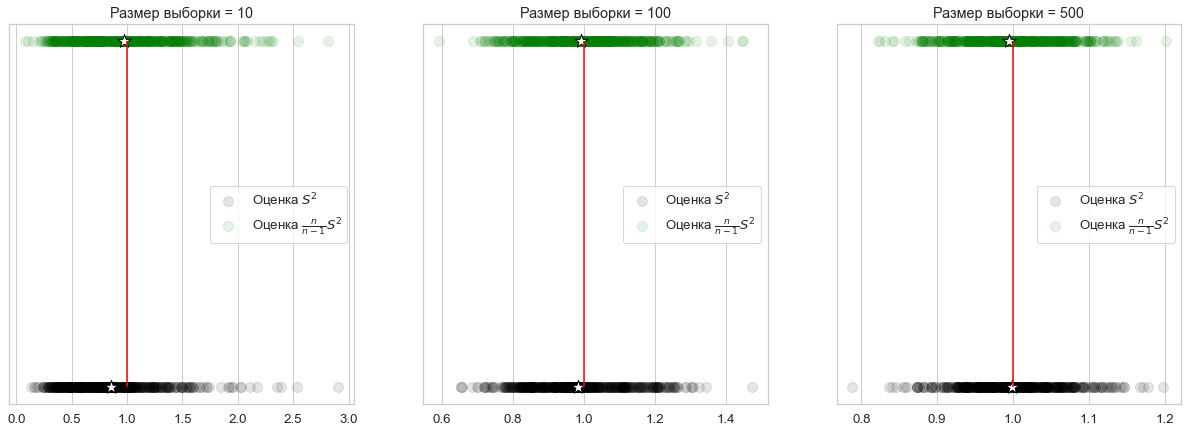

In [53]:
plt.figure(figsize=(21, 7))
colors = ['black', 'green']
labels = ['Оценка $S^2$', r'Оценка $\frac{n}{n-1} S^2$']

def prepare_axes():
    for i, n in enumerate(n_range):
        ax = plt.subplot(1, 3, i + 1)
        plt.vlines(1, 0, 1, color='r')
        plt.title(f'Размер выборки = {n}')
        plt.yticks([])
        plt.legend(loc=5)

def plot_data(thetas, avg_thetas, y):
    for i, n in enumerate(n_range):
        theta = thetas[i]
        avg_theta = avg_thetas[i]
        ax = plt.subplot(1, 3, i + 1)
        plt.scatter(theta, np.zeros(k) + y, 
            alpha=0.1, s=100, color=colors[y], label=labels[y])
        plt.scatter(avg_theta, y, marker='*', s=200, 
            color='w', edgecolors='black')
    
for y, data_schema in enumerate(data):
    thetas, avg_thetas = data_schema
    plot_data(thetas, avg_thetas, y)
    
prepare_axes()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

Подсчитываем $\widetilde{\theta_i}$ для каждого типа оценок

In [123]:
data = []
n = 100
arg_range = np.arange(1, k + 1)
arg_range_minus_1 = arg_range - 1
arg_range_minus_1[0] = 1
X = stats.norm.rvs(size = (k, n), loc = 0, scale = 1)
for theta_type in range(2):
    A = np.mean(X * X, axis=1)
    B = np.power(np.mean(X, axis=1), 2)
    theta = (np.ones(k) if theta_type == 0 else arg_range / arg_range_minus_1) * (A - B)
    pref_sums = theta.cumsum()
    avgs = pref_sums / arg_range
    data += [avgs]

Визуализируем

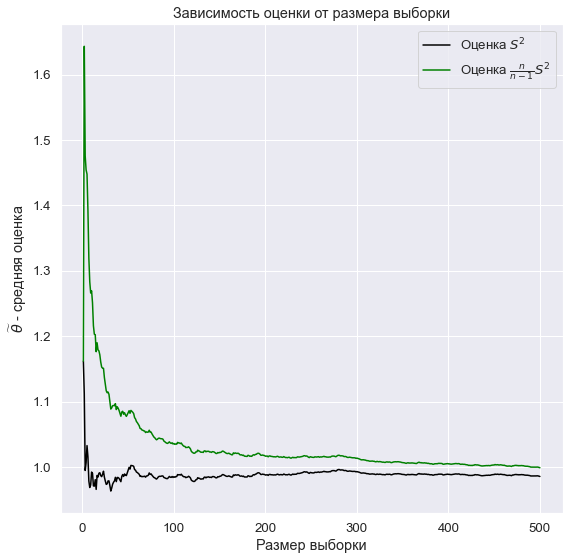

In [124]:
plt.figure(figsize=(9, 9))
with sns.axes_style('darkgrid'):
    ax = plt.axes()
    for i, avgs in enumerate(data):
        ax.plot(arg_range, avgs, label = labels[i], color=colors[i])
    ax.legend()
    ax.set_ylabel(r"$\widetilde{\theta}$ - средняя оценка")
    ax.set_xlabel("Размер выборки")
    ax.set_title("Зависимость оценки от размера выборки");

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

1. Исходя из всего задания: Свойство несмещённости описывает гарантию, что при фиксированном размере выборки матожидание оценки равно истинному параметру. На графиках свойство несмещённости визуализируется наболее быстрым схождением к истинной величине. 
2. Проделанные эксперименты подтверждают п.1 и выведенные тезисы о несмещённости $\frac{n}{n-1}*S^2$ и смещённости $S^2$. Особенно хорошо это видно на последнем графике. Также понятно, что при увеличении n оценки становятся всё менее различимыми. Это обуславливается стремлением величины $\frac{n}{n-1}$ к 1.
3. Из вышесказанного следует, что более точной является оценка $\frac{n}{n-1}*S^2$. Поэтому при подсчёте среднеквадратичного отклонения в физике, используют на практике $\frac{n}{n-1}*S^2$, а не $S^2$(ну или корень из этой величины).

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.